In [1]:
# dise;o de un sistema de baterias para un sistema de almacenamiento de energia


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# load xlsx file
dfp = pd.read_excel('df_final.xlsx')
# Set DateTime Index
dfp.set_index('DateTime', inplace=True)
# delete columns Energia KwH,Irradiancia media (W/m2,Temperatura media (°C),Hour,Month,Day,Energia Kwh predicha (nn)
dfp.drop(['Irradiancia media (W/m2)','Temperatura media (°C)','Hour','Month','Day','Energia Kwh predicha (nn)'], axis=1, inplace=True)

dfp.head()

,Valle - PPC - ACTIVE POWER SETPOINT (kW),Energia Kwh,Energia perdida
DateTime,,,
2022-01-01 00:00:00,50000.0,-10.544850,0.0
2022-01-01 00:05:00,50000.0,-10.526300,0.0
2022-01-01 00:10:00,50000.0,-10.530717,0.0
2022-01-01 00:15:00,50000.0,-10.671283,0.0
2022-01-01 00:20:00,50000.0,-10.486217,0.0


In [4]:
# Función para calcular la energía que carga y descarga la batería los datos de entrada son cinco minutales
def battery(df, battery_size, battery_efficiency, charger_power):
    state_of_charge = 0
    state_of_charge_list = []
    battery_charge = []
    battery_discharge = []
    charger_power = charger_power/12

    for i in range(len(df)):
        if df['Energia perdida'][i] > 0 and (state_of_charge + df['Energia perdida'][i]) < battery_size: # si la energía perdida es mayor a 0 y la suma de la energía perdida y el estado de carga es menor a la capacidad de la batería
            if df['Energia perdida'][i] > charger_power:
                state_of_charge += charger_power
                battery_charge.append(charger_power)
                battery_discharge.append(0)
            else:
                state_of_charge += df['Energia perdida'][i]
                battery_charge.append(df['Energia perdida'][i])
                battery_discharge.append(0)
        elif df['Energia perdida'][i] > 0 and (state_of_charge + df['Energia perdida'][i]) >= battery_size:
            battery_charge.append(battery_size - state_of_charge)
            battery_discharge.append(0)
            state_of_charge = battery_size
        elif df['Energia perdida'][i] <= 0 and (state_of_charge - charger_power) > 0:
            state_of_charge -= charger_power
            battery_charge.append(0)
            battery_discharge.append(charger_power)
        elif df['Energia perdida'][i] <= 0 and (state_of_charge - charger_power) <= 0:
            battery_charge.append(0)
            battery_discharge.append(state_of_charge)
            state_of_charge = 0
        else:
            battery_charge.append(0)
            battery_discharge.append(0)
        state_of_charge_list.append(state_of_charge)
    return battery_charge, battery_discharge, state_of_charge_list



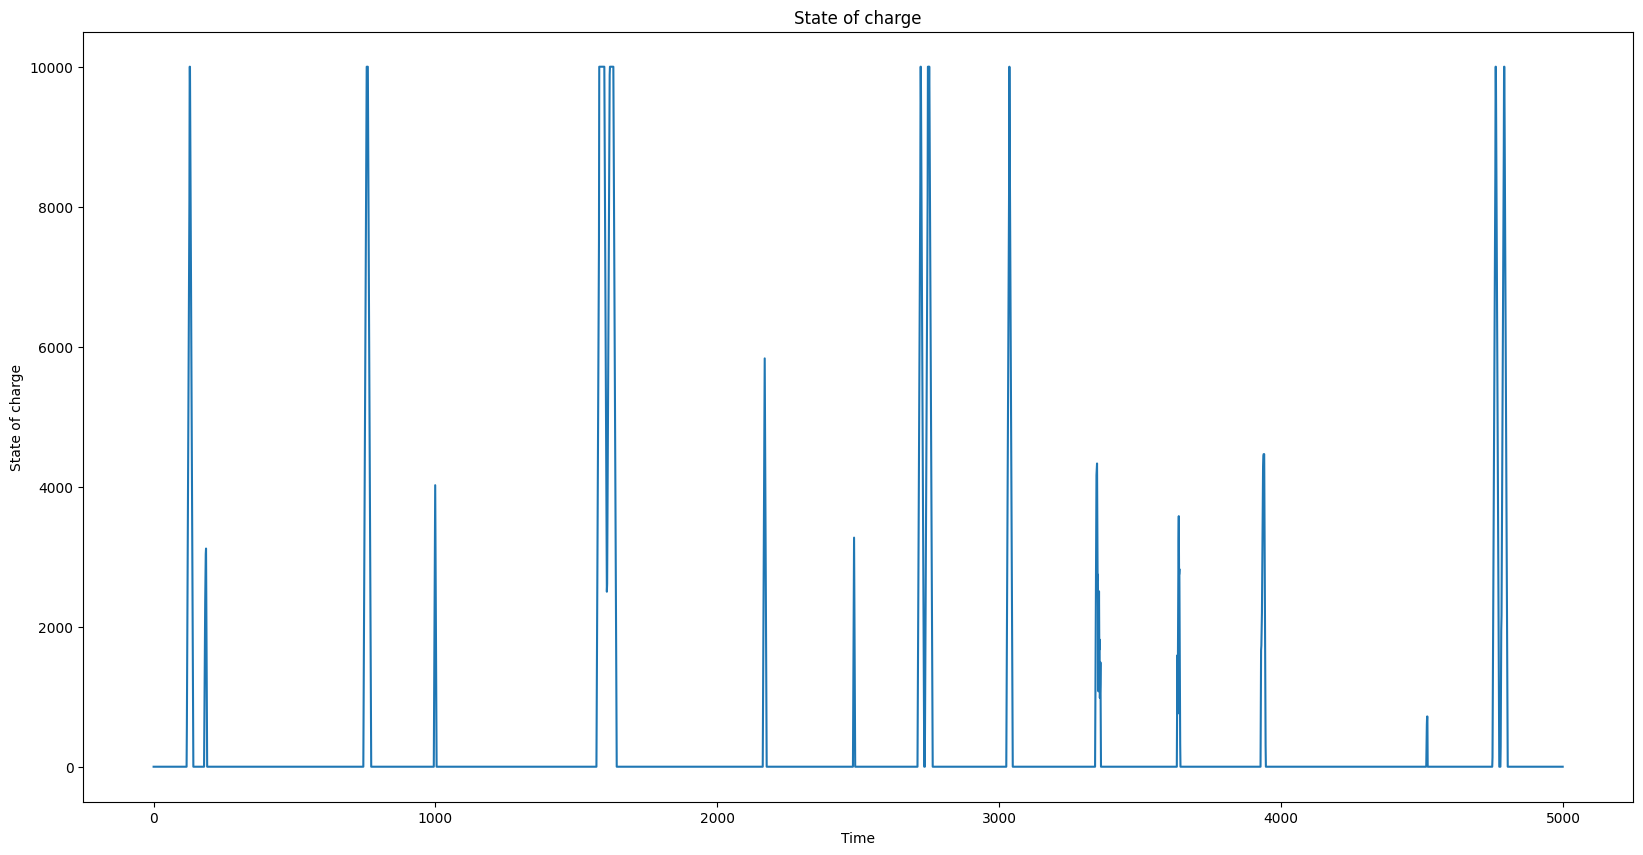

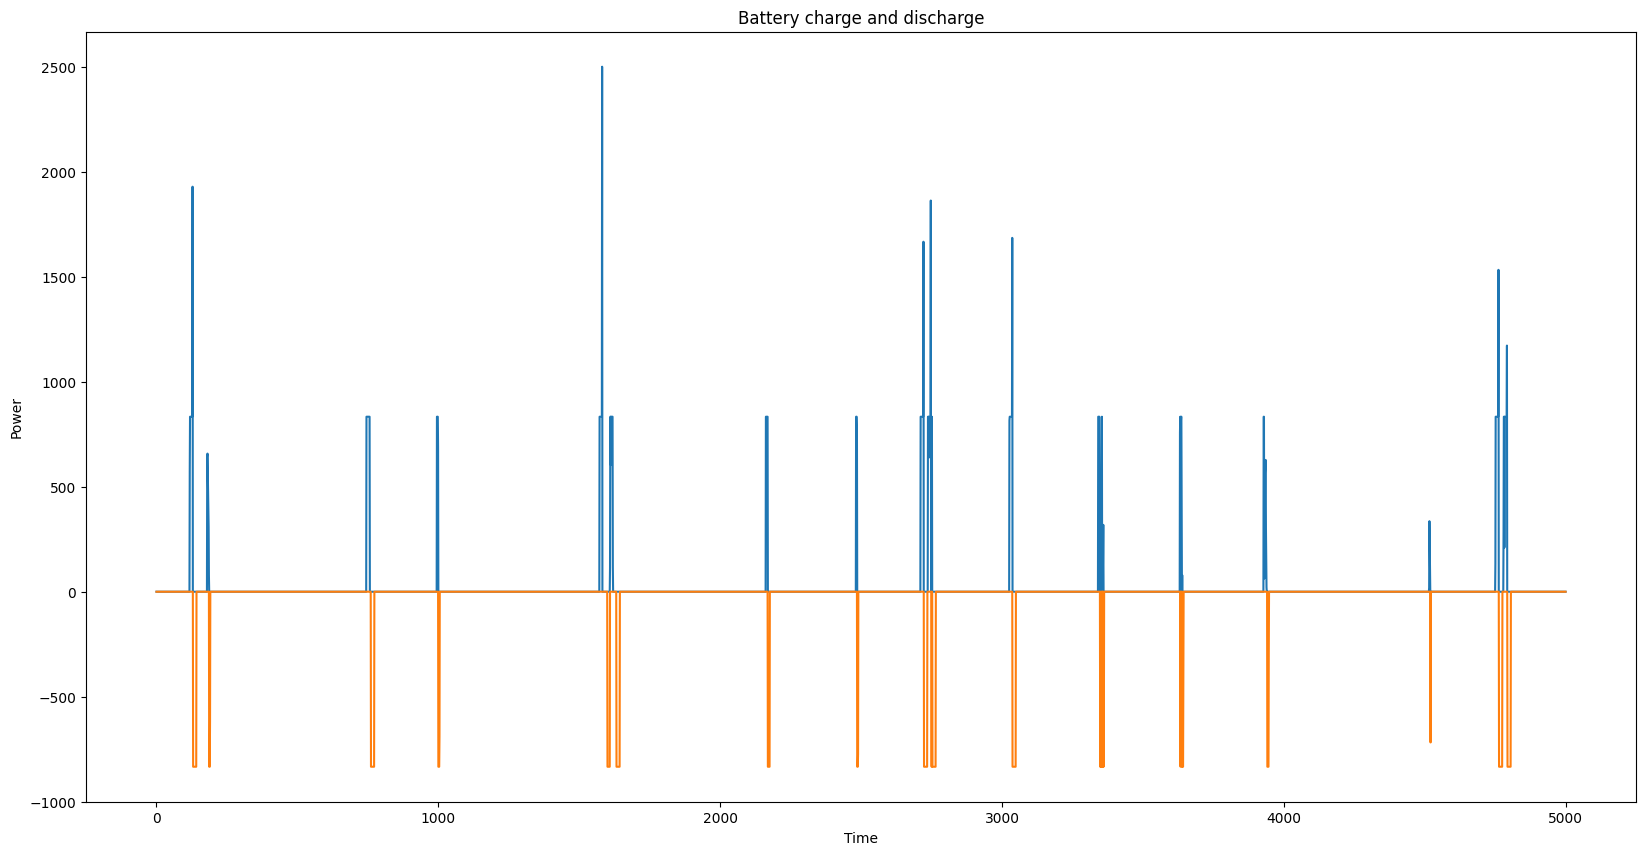

In [5]:
# calculo de la energia que carga y descarga la bateria
battery_charge, battery_discharge, state_of_charge_list = battery(dfp, 10000, 0.9, 10000)
battery_discharge = np.array(battery_discharge)*-1
#plot state of charge 1000 register
plt.figure(figsize=(20,10))
plt.plot(state_of_charge_list[:5000])
plt.title('State of charge')
plt.ylabel('State of charge')
plt.xlabel('Time')
plt.show()
# plot battery charge 10000  and discharge 10000 register in the same graph discharge how negative values
plt.figure(figsize=(20,10))
plt.plot(battery_charge[:5000])
plt.plot(battery_discharge[:5000])
plt.title('Battery charge and discharge')
plt.ylabel('Power')
plt.xlabel('Time')
plt.show()




In [35]:
# create a matrix with diferent battery size and charger power
battery_size = np.array([1000])
charger_power = np.array([1000])
import numpy as np
import pandas as pd

def generar_cuadricula_suma(battery_size_values, charger_power_values, dfp):
    # Crear un diccionario para almacenar las sumas
    data = {}

    for battery_size in battery_size_values:
        for charger_power in charger_power_values:
            battery_charge, battery_discharge, state_of_charge_list = battery(dfp, battery_size, 0.9, charger_power)
            suma_charge = sum(battery_charge)
            # round the value
            suma_charge = round(suma_charge,2)
            if battery_size not in data:
                data[battery_size] = {}

            data[battery_size][charger_power] = suma_charge

    # Crear un DataFrame a partir del diccionario
    df = pd.DataFrame(data).T

    return df

# Ejemplo de uso
battery_size_values = np.array([1000, 2000, 3000,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000])
charger_power_values = np.array([1000, 2000, 3000,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000])
cuadricula_suma_df = generar_cuadricula_suma(battery_size_values, charger_power_values, dfp)
cuadricula_suma_df

KeyError: '1.0'

In [40]:
battery=cuadricula_suma_df/1000
#  save the data in a xlsx file
battery.to_excel('battery2.xlsx')



In [42]:
480*20*5

48000

In [46]:
480*5


2400